[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv5 on Custom Objects

> **⚠️ Note:** This notebook has been updated since its creation. You may find it slightly different to the version shown in the accompanying [YouTube video](https://www.youtube.com/watch?v=x0ThXHbtqCQ) or [blog post](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/).

YOLOv5 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model, released on November 22, 2022 by Ultralytics. The YOLOv5 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Disclaimer

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv5](https://blog.roboflow.ai/how-to-train-yolov5-on-a-custom-dataset/), concurrently.

## Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train YOLOv5 on your custom objects. We use the [Cash Counter](https://universe.roboflow.com/alex-hyams-cosqx/cash-counter/dataset/11) dataset, which is open source and free to use. You can also use this notebook on your own data.

To train our detector we take the following steps:

- Before you start
- Install YOLOv5
- Roboflow Universe
- Prepare a Custom Dataset
- Download custom YOLOv5 object detection data
- Train Custom YOLOv5 Detector
- Evaluate Custom YOLOv5 Detector Performance
- Run Inference With Trained Weights
- Deploy Model on Roboflow
- Deploy Your Model to the Edge

Let's get started!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Jul 30 17:41:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install YOLOv5


In [2]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 17516 (delta 8), reused 0 (delta 0), pack-reused 17494 (from 3)
Receiving objects: 100% (17516/17516), 16.62 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (12004/12004), done.


In [3]:
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=bdcce9b7-2b61-80dd-ac60-0a33fba7ae33, L2_cache_size=4MB)


## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 200,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>


## Step 6: Download a Dataset

Run the code below to authenticate with Roboflow and download the dataset. Follow the link to generate an authentication token.

Alternatively, provide an API key like so: `rf = Roboflow(api_key=...)`

> 🟢 **Tip:** The examples below work even if you use our non-custom dataset. However, you won't be able to deploy the model to Roboflow. To do that, create a custom dataset as described above or fork (copy) one into your [workspace](https://app.roboflow.com/) from [Universe](https://universe.roboflow.com/).

In [4]:
%cd /content/yolov5
!pip install -q roboflow==1.1.48

from roboflow import Roboflow
rf = Roboflow(api_key="wJBBQfaNuQEzPQr1YSIu")
project = rf.workspace("crash-detection-nptx7").project("cctv_car_bike_detection-b6kxa-frphn")
version = project.version(1)
dataset = version.download("yolov5")


/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cctv_car_bike_detection-1 in yolov5pytorch:: 100%|██████████| 22118/22118 [00:06<00:00, 3318.42it/s] 


# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **cache:** cache images for faster training

In [10]:
# train yolov5s on custom data for 25 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 100 \
  --data /content/yolov5/cctv_car_bike_detection-1/data.yaml \
  --weights yolov5n.pt \
  --name yolov5n_results  \
  --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      96/99      1.12G    0.02884     0.0171   0.004251         69        416:  29% 195/669 [00:29<01:33,  5.05it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      96/99      1.12G    0.02882     0.0171   0.004245         83        416:  29% 196/669 [00:29<01:40,  4.70it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      96/99      1.12G    0.02882    0.01709   0.004234         91        416:  29% 197/669 [00:29<01:37,  4.85it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

# Evaluate Custom YOLOv5 Detector Performance

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/yolov5s_results/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [14]:
# Convert the best.pt model to ONNX format
%cd /content/yolov5/
!python export.py --weights /content/yolov5/runs/train/yolov5n_results4/weights/best.pt --include onnx

/content/yolov5
export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/yolov5n_results4/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1767283 parameters, 0 gradients, 4.2 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/yolov5n_results4/weights/best.pt with output shape (1, 25200, 11) (3.6 MB)

ONNX: starting export with onnx 1.18.0...
ONNX: export success ✅ 0.5s, saved as /content/yolov5/runs/train/yolov5n_results4/weights/best.onnx (7.2 MB)

Export complete (0.9s)
Results saved to /content/yolov5/runs/train/yolov5n_results4/weights
Detect:         

In [15]:
# Convert the best.pt model to ONNX format
%cd /content/yolov5/
!python export.py --weights /content/yolov5/runs/train/yolov5n_results4/weights/best.pt --include tflite

/content/yolov5
export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/yolov5n_results4/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 1767283 parameters, 0 gradients, 4.2 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/yolov5n_results4/weights/best.pt with output shape (1, 25200, 11) (3.6 MB)
2025-07-30 21:03:02.843633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753909382.874360   51365 cuda_dnn.cc

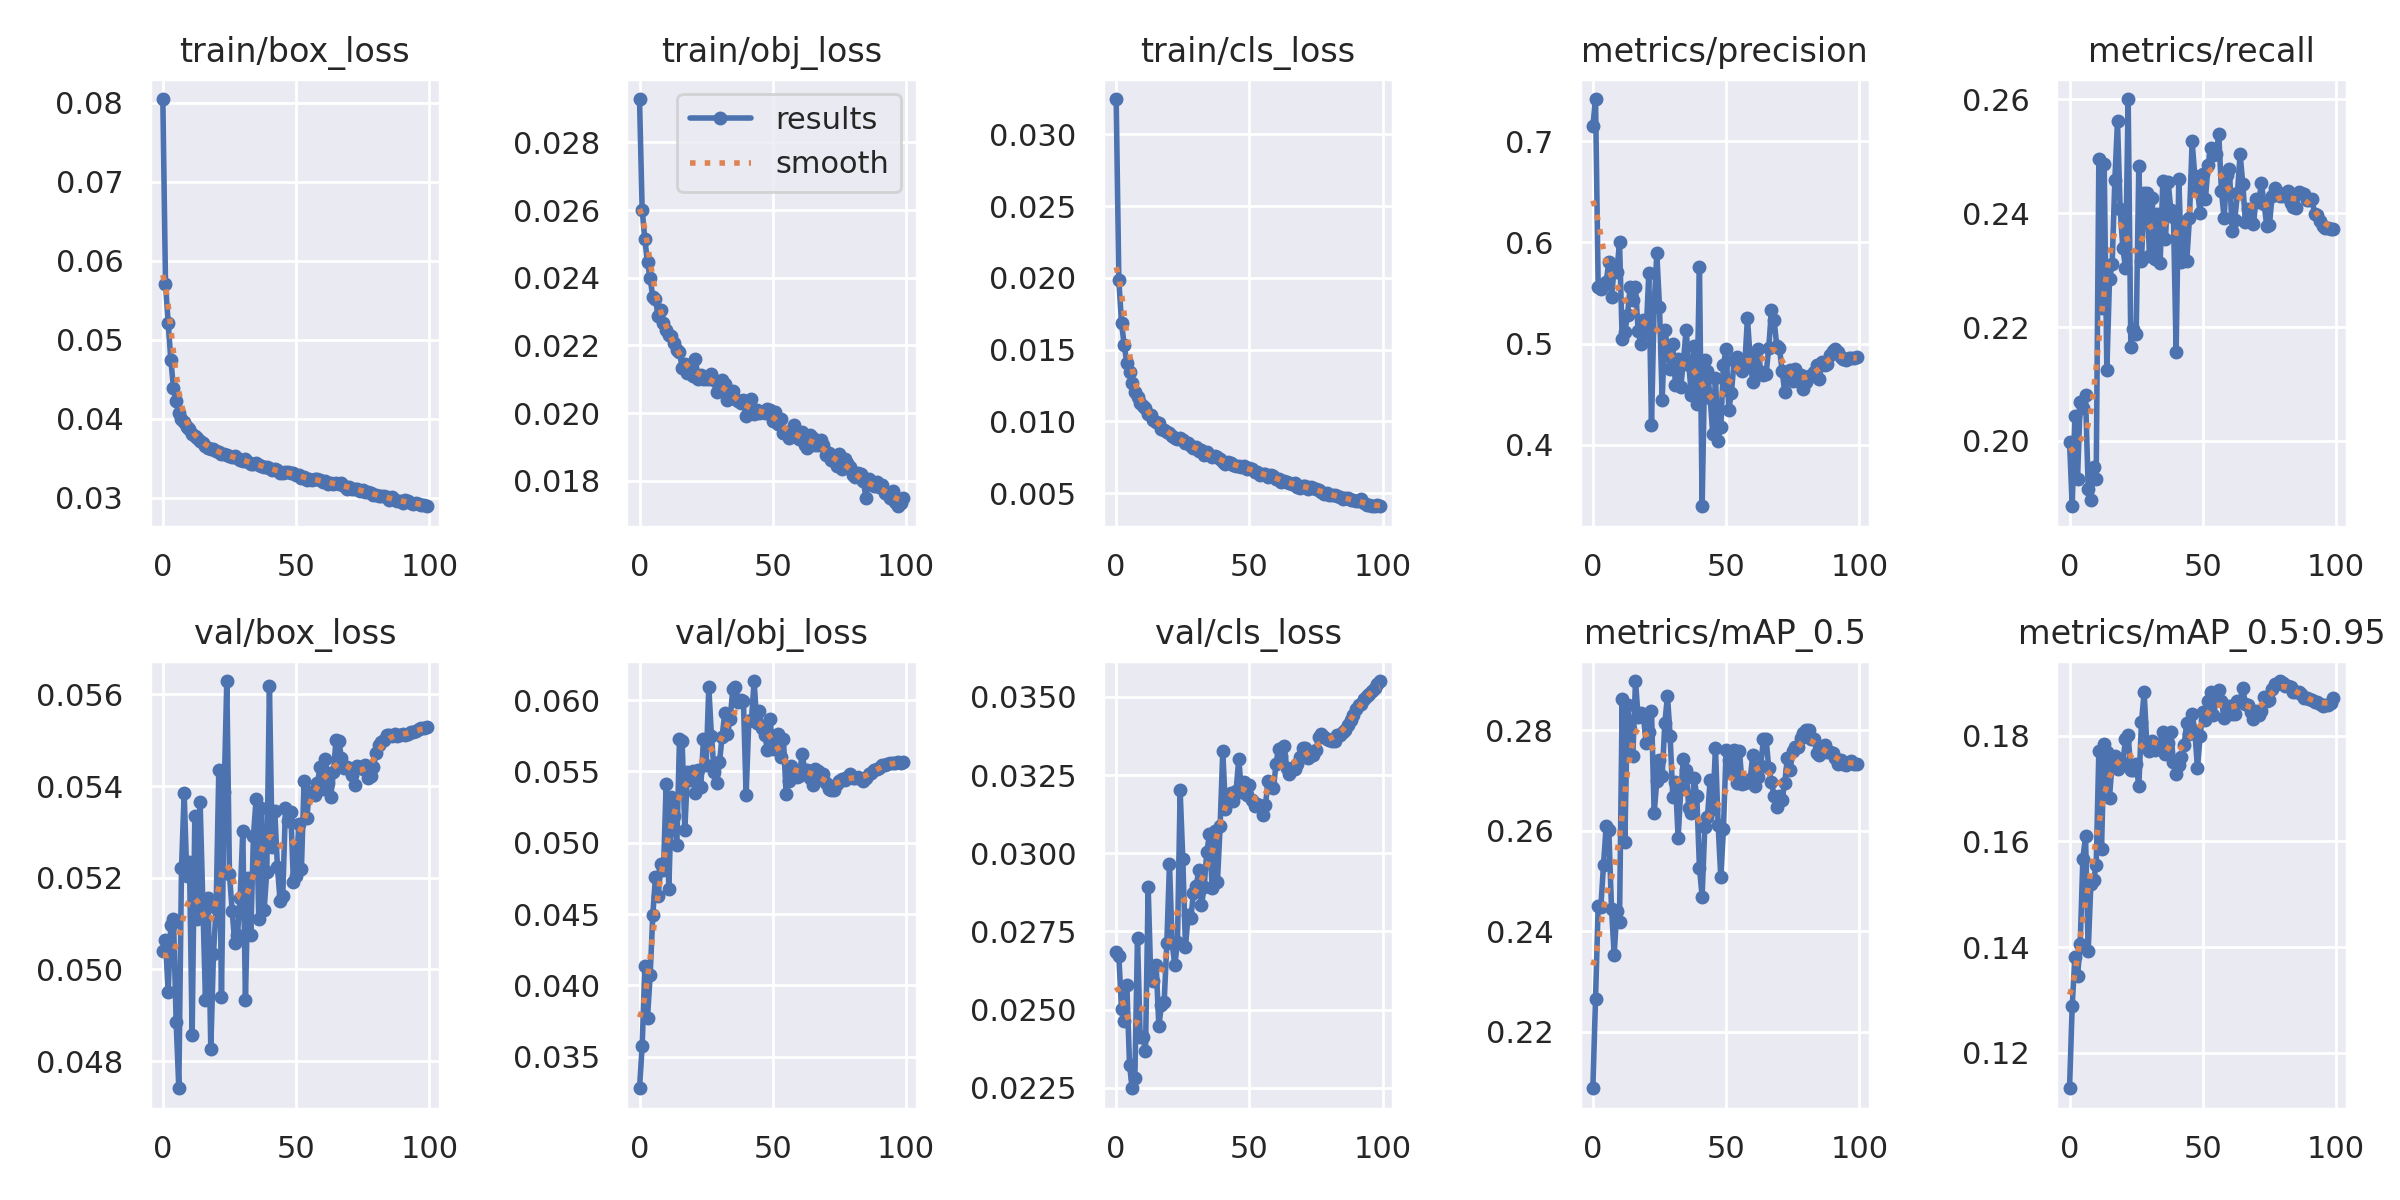

In [16]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5n_results4/results.png', width=1000)

In [18]:
# Validate the best.pt model
%cd /content/yolov5/
!python val.py --weights runs/train/yolov5n_results4/weights/best.pt --data /content/yolov5/cctv_car_bike_detection-1/data.yaml --img 416 --conf 0.50

/content/yolov5
val: data=/content/yolov5/cctv_car_bike_detection-1/data.yaml, weights=['runs/train/yolov5n_results4/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.5, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 1767283 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /content/yolov5/cctv_car_bike_detection-1/valid/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100% 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 9/9 [00:04<00:00,  1.87it/s]
                   all        287       2088      0.557      0.